In [13]:
%matplotlib inline

# target_test.csv и target_train.csv

In [119]:
%run -n main.py
target = list(read_target(TARGET_TRAIN))
test = list(read_target(TARGET_TEST))

In [56]:
target[:5]

[TargetRecord(month=Timestamp('2014-11-01 00:00:00'), id='pLEqn20t4hK6E1U0fG80TPkusHY=OheXhIX3Negh/F4rqkwt5YiAWvo=', churn=False),
 TargetRecord(month=Timestamp('2014-11-01 00:00:00'), id='o5UNJ6bfcvvfZVkr7I5lP0BxnwQ=b1EBM7qDYX5IE8uFfxT+t35GvRg=', churn=False),
 TargetRecord(month=Timestamp('2014-11-01 00:00:00'), id='tGerzXbWLZzLQbrKND7aHUviznI=wD4yb2JW15NMTvVKMszthyXnAUg=', churn=False),
 TargetRecord(month=Timestamp('2014-11-01 00:00:00'), id='GLiZukGscMDsZ9gXWT3Fcgn74+w=K+iMpCQsduglOsYkdIUQZQMtaDM=', churn=False),
 TargetRecord(month=Timestamp('2014-11-01 00:00:00'), id='vdQBJ41tLktl4bAhgmhaFwdK6yI=z8qIYGby7AvDPmhfQuuSyfmQUoY=', churn=False)]

In [57]:
test[:5]

[TargetRecord(month=Timestamp('2015-02-01 00:00:00'), id='pLEqn20t4hK6E1U0fG80TPkusHY=OheXhIX3Negh/F4rqkwt5YiAWvo=', churn=None),
 TargetRecord(month=Timestamp('2015-02-01 00:00:00'), id='o5UNJ6bfcvvfZVkr7I5lP0BxnwQ=b1EBM7qDYX5IE8uFfxT+t35GvRg=', churn=None),
 TargetRecord(month=Timestamp('2015-02-01 00:00:00'), id='tGerzXbWLZzLQbrKND7aHUviznI=wD4yb2JW15NMTvVKMszthyXnAUg=', churn=None),
 TargetRecord(month=Timestamp('2015-02-01 00:00:00'), id='GLiZukGscMDsZ9gXWT3Fcgn74+w=K+iMpCQsduglOsYkdIUQZQMtaDM=', churn=None),
 TargetRecord(month=Timestamp('2015-02-01 00:00:00'), id='vdQBJ41tLktl4bAhgmhaFwdK6yI=z8qIYGby7AvDPmhfQuuSyfmQUoY=', churn=None)]

In [348]:
target_ids = [_.id for _ in target]
test_ids = [_.id for _ in test]

Почему-то в тренировочных данных id неуникальные

In [59]:
print 'Total target ids:', len(target_ids)
print 'Unique target ids:', len(set(target_ids))

Total target ids: 50939
Unique target ids: 19697


Часто для одного id повторяют "в ноябре не ушёл, в декабре не ушёл, в январе не ушёл". Зачем? Лучше бы побольше разных id выгрузили. Период, кстати, тоже блестяще выбраны: НГ, праздники.

In [123]:
target_table = pd.DataFrame(target)
target_table.columns = ['month', 'id', 'churn']

In [124]:
table = target_table.pivot('id', 'month', 'churn')
table.head(20)

month                                              2014-11-01 2014-12-01  \
id                                                                         
++1bFkShFFpFU4GZUgKgyYSB5K0=mRt2ytNDjwH6XemQY6J...      False      False   
++2cBeC/UEz4BrhlxdL8a6oD9Uo=y5L96d4Z+OSXWLMWtjw...        NaN      False   
++7nq+bqX8Vu2+FCk/mEhl0fNnc=zVGW37tHjdXdkItOJCV...        NaN      False   
++Ih/EonzIGxcopatn3bkyj8W14=K+iMpCQsduglOsYkdIU...      False      False   
++tpcfrV2HNcYhVFta9iSx7FrLE=AN7OinNFjOdMeNN4ECY...      False      False   
++v0JgSoryGwn/Nw+aN3dQxCVt0=siZqqQbt4dXbF3oDvDc...      False      False   
+/UuG4DbGOJ9YjVadWgyQqiBZoE=OvnqPTbqFUMgIXTjwIS...      False      False   
+06NsHyeXvDxLeud4v1SqIIQ7cA=vTlylpKHECHufqP1D5x...        NaN      False   
+11Bqzv+LadE4UIDKUbH3vn3RIE=ZkL57yyf91+1sF7YB0V...      False      False   
+1WmDXhd0p1mXq/rd/m2zHw6mmQ=ckc1iTjmZCyv4hujh+y...      False      False   
+1lOY+OodyANjh/MAyhcRg3ADxo=K+iMpCQsduglOsYkdIU...        NaN        NaN   
+1wXP9/hgxshPXvCEE9HxxHQtpg=BXDmlQtPA+ThDGzw0+z...        NaN        NaN   
+1wedOITkZE8g3QPW2usAygfJSo=EkQemVgd6nl8jKy7KQl...      False      False   
+1z2UOfnS9MFEobW8bmYYaAZseY=vVvEZVO5jH8lEfv+8mA...      False      False   
+27tEkVZOq5UfnweykpFVpUH3+8=3S3qVHDoF8Wt8o10so8...        NaN      False   
+2Xdf3WJ/Rw+dckLWfTuu5g3PFU=/m7o+LfSuugydN4wYE9...      False      False   
+2YxONL1ZWxcc3sRXZKhrupmePA=RmoFR1FKwJoAWR93DTH...      False      False   
+2aVGQYuoYYZWyCKxXU3MW790yA=RmoFR1FKwJoAWR93DTH...      False      False   
+2e4OXlm8fJumS3pIZQBf9MAatg=32r5lQVSU6tZPqt77rA...        NaN      False   
+2wiIBFPxP0n4Bn5qzmkRmS5E1g=tda7jgBOjYVV+oDdThh...        NaN       True   

month                                              2015-01-01  
id                                                             
++1bFkShFFpFU4GZUgKgyYSB5K0=mRt2ytNDjwH6XemQY6J...      False  
++2cBeC/UEz4BrhlxdL8a6oD9Uo=y5L96d4Z+OSXWLMWtjw...      False  
++7nq+bqX8Vu2+FCk/mEhl0fNnc=zVGW37tHjdXdkItOJCV...      False  
++Ih/EonzIGxcopatn3bkyj8W14=K+iMpCQsduglOsYkdIU...      False  
++tpcfrV2HNcYhVFta9iSx7FrLE=AN7OinNFjOdMeNN4ECY...      False  
++v0JgSoryGwn/Nw+aN3dQxCVt0=siZqqQbt4dXbF3oDvDc...      False  
+/UuG4DbGOJ9YjVadWgyQqiBZoE=OvnqPTbqFUMgIXTjwIS...      False  
+06NsHyeXvDxLeud4v1SqIIQ7cA=vTlylpKHECHufqP1D5x...      False  
+11Bqzv+LadE4UIDKUbH3vn3RIE=ZkL57yyf91+1sF7YB0V...      False  
+1WmDXhd0p1mXq/rd/m2zHw6mmQ=ckc1iTjmZCyv4hujh+y...      False  
+1lOY+OodyANjh/MAyhcRg3ADxo=K+iMpCQsduglOsYkdIU...      False  
+1wXP9/hgxshPXvCEE9HxxHQtpg=BXDmlQtPA+ThDGzw0+z...       True  
+1wedOITkZE8g3QPW2usAygfJSo=EkQemVgd6nl8jKy7KQl...      False  
+1z2UOfnS9MFEobW8bmYYaAZseY=vVvEZVO5jH8lEfv+8mA...      False  
+27tEkVZOq5UfnweykpFVpUH3+8=3S3qVHDoF8Wt8o10so8...      False  
+2Xdf3WJ/Rw+dckLWfTuu5g3PFU=/m7o+LfSuugydN4wYE9...      False  
+2YxONL1ZWxcc3sRXZKhrupmePA=RmoFR1FKwJoAWR93DTH...      False  
+2aVGQYuoYYZWyCKxXU3MW790yA=RmoFR1FKwJoAWR93DTH...      False  
+2e4OXlm8fJumS3pIZQBf9MAatg=32r5lQVSU6tZPqt77rA...      False  
+2wiIBFPxP0n4Bn5qzmkRmS5E1g=tda7jgBOjYVV+oDdThh...       True

Чаще всего для пользователя указано, что он три раза не ушёл. Пользователей, которые ушли вообще крохи, 400 штук, примерно. Есть даже те, кто ушли и потом вернулись: 30 штук.

In [128]:
table = target_table.pivot('id', 'month', 'churn')
months = list(table.columns)
table = table.reset_index().fillna('Unknown')
table = table.groupby(months).size()
table

2014-11-01 00:00:00  2014-12-01 00:00:00  2015-01-01 00:00:00
False                False                False                  12603
                                          True                      99
                                          Unknown                   92
                     True                 False                     10
                                          True                     124
                     Unknown              False                     83
                                          True                      20
                                          Unknown                   62
True                 False                Unknown                   12
                     True                 Unknown                   90
                     Unknown              Unknown                  156
Unknown              False                False                   5134
                                          True                      56
               

Предсказывать всё нужно будет для февраля

In [82]:
set(_.month for _ in test)

{Timestamp('2015-02-01 00:00:00')}

Ну слава богу

In [85]:
print 'Total test ids:', len(test_ids)
print 'Unique test ids:', len(set(test_ids))

Total test ids: 26414
Unique test ids: 26414


70% пользователей из тренировочной выборки есть в тестовой

In [92]:
test_target_ids = set(test_ids) & set(target_ids)
print len(test_target_ids)

18512


Посмотрим на них подробнее

In [129]:
table = target_table.pivot('id', 'month', 'churn')
test_target_table = table.reindex(index=test_target_ids)
test_target_table.head(20)

month                                              2014-11-01 2014-12-01  \
id                                                                         
drzgYfD/KyV312otNerxOMGj9ks=GAiu85msFUVvInkXW7x...      False      False   
XtOPGcypMqRo6hPu9LIfxt3YXg8=C6xty8Qd7bxvJrgpHIl...        NaN      False   
6hQWRoLaNOHlWP23CipL5f55ECA=DUcjw66omMz1dGlmOB1...      False        NaN   
0x5P9STXkK2LdLjqHFJlu2d68QQ=mkKMHPeV4MK33Q58jH0...      False      False   
19nI1UsPD0ASvEam6+Efbe+JmSY=FzkSvSPXAOEcKwoqFKu...      False      False   
XxUHyN55kbXhl85TeeIItNGTleE=7wSKT3ymGzECUQwlHvs...      False      False   
fHnnUJLJvWnRmsbQSk0JrPlbQTk=IIknVGMjCFacghhO0Ps...      False      False   
finQI2+7lKr+S0FRZ/9zZ/MysLM=2ktQcY+FUZE+l1fkeYF...        NaN        NaN   
+sInCAL0URe3uZu4d3Em9KRdD0k=NSeyFwysXs0kDgAoDPF...      False      False   
jmwUzn7EJxX6mb58d5tHl9JLkoY=ckc1iTjmZCyv4hujh+y...      False      False   
yXyMVgWRIvGRKDscZsijEJqB4O8=tQPHp9jDKtimAmsoqyA...      False      False   
USPeTOffYc3GvmT/WJR4/xZlPcw=y5Ak3NcmmNc1lwm6KMY...      False      False   
Rdiq41pEcc2lhu8AO26RUK0Vv08=yL6wlhovxvMF14arIaD...        NaN      False   
gsmjLR4qrgdMXDanJ9SzAazlVis=0vTDWr/ZDvHFNFONMPa...      False      False   
YPB/0H6g2YHK7ZQJT277xNnI290=vVvEZVO5jH8lEfv+8mA...      False      False   
N6RTOPUGaTj0iRjEbakZUjStXXY=U5fXpflRnB0lkFBkk/9...      False      False   
RHpUYZNeHet4PGsA8l1gj6JUCnw=Mz2Cf14MNPf/UbAYPjq...      False      False   
SuJDJb8yf0BVv7p+ku3fmqcmo1g=vVvEZVO5jH8lEfv+8mA...      False      False   
OJoT5LUq5R5EMOX8AbHTvrEfiSg=dnvpt9S05sn/ThHUJTQ...        NaN      False   
HDxTe6JFEqaUr2Bvh0qt4TDPMJc=inwzhgx47lQ01oPY2u1...      False      False   

month                                              2015-01-01  
id                                                             
drzgYfD/KyV312otNerxOMGj9ks=GAiu85msFUVvInkXW7x...      False  
XtOPGcypMqRo6hPu9LIfxt3YXg8=C6xty8Qd7bxvJrgpHIl...      False  
6hQWRoLaNOHlWP23CipL5f55ECA=DUcjw66omMz1dGlmOB1...      False  
0x5P9STXkK2LdLjqHFJlu2d68QQ=mkKMHPeV4MK33Q58jH0...      False  
19nI1UsPD0ASvEam6+Efbe+JmSY=FzkSvSPXAOEcKwoqFKu...      False  
XxUHyN55kbXhl85TeeIItNGTleE=7wSKT3ymGzECUQwlHvs...      False  
fHnnUJLJvWnRmsbQSk0JrPlbQTk=IIknVGMjCFacghhO0Ps...      False  
finQI2+7lKr+S0FRZ/9zZ/MysLM=2ktQcY+FUZE+l1fkeYF...      False  
+sInCAL0URe3uZu4d3Em9KRdD0k=NSeyFwysXs0kDgAoDPF...      False  
jmwUzn7EJxX6mb58d5tHl9JLkoY=ckc1iTjmZCyv4hujh+y...      False  
yXyMVgWRIvGRKDscZsijEJqB4O8=tQPHp9jDKtimAmsoqyA...      False  
USPeTOffYc3GvmT/WJR4/xZlPcw=y5Ak3NcmmNc1lwm6KMY...      False  
Rdiq41pEcc2lhu8AO26RUK0Vv08=yL6wlhovxvMF14arIaD...      False  
gsmjLR4qrgdMXDanJ9SzAazlVis=0vTDWr/ZDvHFNFONMPa...      False  
YPB/0H6g2YHK7ZQJT277xNnI290=vVvEZVO5jH8lEfv+8mA...      False  
N6RTOPUGaTj0iRjEbakZUjStXXY=U5fXpflRnB0lkFBkk/9...      False  
RHpUYZNeHet4PGsA8l1gj6JUCnw=Mz2Cf14MNPf/UbAYPjq...      False  
SuJDJb8yf0BVv7p+ku3fmqcmo1g=vVvEZVO5jH8lEfv+8mA...      False  
OJoT5LUq5R5EMOX8AbHTvrEfiSg=dnvpt9S05sn/ThHUJTQ...      False  
HDxTe6JFEqaUr2Bvh0qt4TDPMJc=inwzhgx47lQ01oPY2u1...      False

Для 150 я кажется знаю ответ: они уйдут в феврале, потому что уже ушли в январе.

In [130]:
months = list(test_target_table.columns)
table = test_target_table.reset_index().fillna('Unknown')
table = table.groupby(months).size()
table

2014-11-01 00:00:00  2014-12-01 00:00:00  2015-01-01 00:00:00
False                False                False                  12485
                                          True                      99
                                          Unknown                   58
                     Unknown              False                     62
                                          True                      10
                                          Unknown                    2
Unknown              False                False                   5054
                                          True                      56
                                          Unknown                   45
                     Unknown              False                    599
                                          True                      42
dtype: int64

# train.csv

In [196]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
ids = set(target_ids + test_ids)
both_ids_in, histogram = count_ids_records(train, ids)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

Очень плохие новости:
  * Из train.csv ничего выкинуть нельзя, используется 25 258 827 записей из 25 259 805
  * Для каждого пользователя там не одна запись а в среднем 300
  * То есть это какбы логи, в которых вместо полей хеши. Я бы мог ещё понять естли бы они выложили агрегаты со значения-хешами. Но логи с хешами — это капец

Records with ids: 25258827
Records with id1 and id2 in ids: 315492
Median records per id: 321


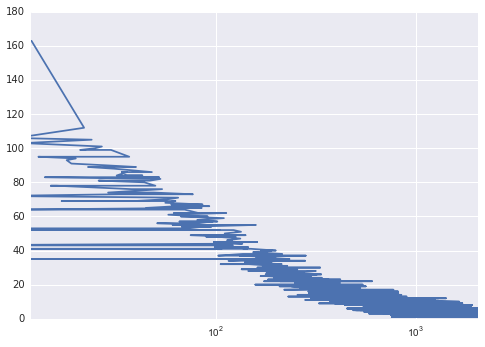

In [216]:
%run -n main.py
print 'Records with ids:', sum(histogram.values())
print 'Records with id1 and id2 in ids:', both_ids_in
print 'Median records per id:', sorted(histogram.values())[len(histogram) / 2]
table = pd.Series(histogram.values())
table = table.value_counts()
table.plot(logx=True)

Посмотрим на одного пользователя, у которого ~13 000 записей

In [222]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
ids = {'BJsrDUyCsp6PNUBbVGTH9IlMhZI=kTk5T9XMevIvxS4TarYFh1giHLg='}
write_train(filter_train_by_ids(train, ids), TRAIN_SAMPLE)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

In [1]:
%run -n main.py
sample = list(read_train(TRAIN_SAMPLE))

In [262]:
features_table = pd.DataFrame([_.features for _ in sample])
features_table.head(10)

0                 1                 2   \
0  11.11.2014 10:35  10.11.2014 16:00  11.11.2014 10:35   
1  16.06.2014 19:42  02.03.2014 16:00  02.03.2014 16:00   
2  27.10.2014 04:01  26.10.2014 17:00  27.10.2014 04:01   
3  19.06.2014 21:21  07.05.2014 17:00  07.05.2014 17:00   
4  22.12.2014 05:59  21.12.2014 16:00  22.12.2014 05:59   
5  17.06.2014 16:50  06.04.2014 17:00  06.04.2014 17:00   
6  21.10.2014 09:34  20.10.2014 17:00  21.10.2014 09:34   
7  19.06.2014 21:51  24.04.2014 17:00  24.04.2014 17:00   
8  12.12.2014 06:46  11.12.2014 16:00  12.12.2014 06:46   
9  15.06.2014 09:55  08.01.2014 16:00  08.01.2014 16:00   

                             3                             4       5   \
0  QtuOHyH0+RTBkxH7FSFLsjwL8G4=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
1  geiIOdGS7VFnablXFOD6Dk80nx8=  FK5obN7BiMmbGxFgNu0IBXRC4xc=  155250   
2  bfY8rZ91tcZLdTXSXE/0f2pRzA0=  FK5obN7BiMmbGxFgNu0IBXRC4xc=  155250   
3  cmo71dL1Tu409zMKvE8dkWQkQrM=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
4  bfY8rZ91tcZLdTXSXE/0f2pRzA0=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
5  nOzplk/T0RDpSL4LQYYXn00D91o=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
6  bfY8rZ91tcZLdTXSXE/0f2pRzA0=  FK5obN7BiMmbGxFgNu0IBXRC4xc=  155250   
7  oWJ6Nt4e9t5JBrI43gGJTHn2Nec=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
8  Qa/iM24O+6lYyV/7/3SaI0yt4mE=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   
9  FG0m5wwx6//MEeQ5xeKiPe/yg7o=  K+iMpCQsduglOsYkdIUQZQMtaDM=    null   

        6            7                             8   \
0     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
1  Родники  Регистрация  K+iMpCQsduglOsYkdIUQZQMtaDM=   
2  Родники  Регистрация  K+iMpCQsduglOsYkdIUQZQMtaDM=   
3     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
4     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
5     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
6  Родники  Регистрация  K+iMpCQsduglOsYkdIUQZQMtaDM=   
7     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
8     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   
9     null         null  K+iMpCQsduglOsYkdIUQZQMtaDM=   

                             9               ...                       48  \
0  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...                7167910.0   
1  0Dw2prbHHA/LjiH1MNv+EwbrEIo=              ...               4.871818E7   
2  0Dw2prbHHA/LjiH1MNv+EwbrEIo=              ...               5.316644E7   
3  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...               2.848216E7   
4  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...                1654220.0   
5  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...               2.388735E7   
6  0Dw2prbHHA/LjiH1MNv+EwbrEIo=              ...                  2.169E7   
7  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...                1716890.0   
8  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...                 560020.0   
9  K+iMpCQsduglOsYkdIUQZQMtaDM=              ...                9285840.0   

           49          50                            51   52  \
0   7167910.0   7167910.0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
1  4.871818E7  4.871818E7  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
2  5.316644E7  5.316644E7  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
3  2.848216E7  2.848216E7  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
4   1654220.0   1654220.0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
5  2.388735E7  2.388735E7  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
6     2.169E7     2.169E7  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
7   1716890.0   1716890.0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
8    560020.0    560020.0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   
9   9285840.0   9285840.0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR   

                             53   54                            55    56  \
0  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR  qgHeMBq2SoK9WOCtDd+ed8aFxyo=  PROV   
1  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR  63eqhOtefTqh8aCL/ATztsKz+g4=  PROV   
2  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR  VirRW4Ua51X3PABTmxlVSlSFF0k=  PROV   
3  wTgpJjxGacgy9sjcoSX3wWLAzNw=  RUR  22c+qiHNeidvYNrR8kWi9qx0XLk=  PROV   
4 

In [304]:
dates_table = pd.DataFrame()
table = features_table[features_table[0] != 'null']
for column in range(3):
    dates_table[column] = [parse_timestamp(_) for _ in table[column]]
dates_table = dates_table.sort(0)

Какая-то большая активность в июне в первой колонке

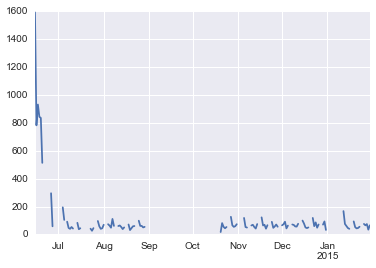

In [306]:
table = dates_table[0].value_counts()
table = table.resample('d', how='sum')
table.plot()

Вторая колонка всегда меньше первой. И отличается максимум на несколько дней. Исключение — июнь

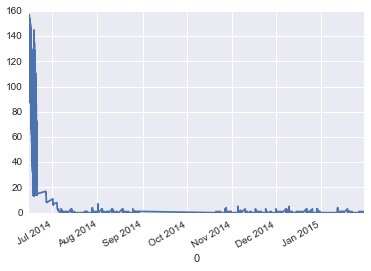

In [324]:
deltas = dates_table[0] - dates_table[1]
table = pd.Series([_.days for _ in deltas])
table.index = dates_table[0]
table.plot()

В июне разница между первой и второй колонкой постепенно уменьшалась

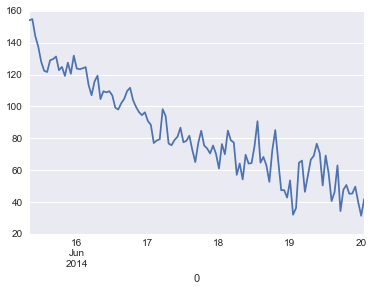

In [333]:
table[:5100].resample('H').plot()

Во второй колонке все события в четыре или пять часов ноль минут

In [334]:
Counter([_.hour for _ in dates_table[1]])

Counter({17: 6587, 16: 6160})

Третья колонка чаще равна первой. Исключение — июнь. Короче предполагаю что в первой колонке время транзакции. Во второй — какие-то непонятный системные таймстемпы

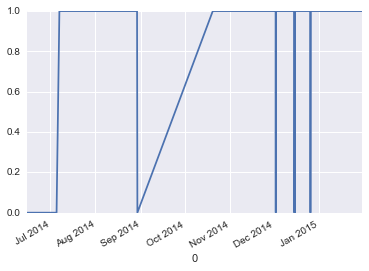

In [315]:
table = pd.Series(dates_table[2] == dates_table[0])
table.index = dates_table[0]
table.plot()

In [42]:
table = features_table[3].value_counts()
print 'Distinct values:', len(table)
print 'Top:'
print table.head()

Distinct values: 10026
Top:
bfY8rZ91tcZLdTXSXE/0f2pRzA0=    1858
j57G9bWogoq3kSGptC5zV9Q2Oes=      95
e47No9K8YhtTnZAzM9lj4Gk/+4A=      59
Mh+dCWAjBQp6UwcQS1+4wEFS4OM=      30
5AwNCxPCd90cmUqEm43xWX63p0g=      21
dtype: int64


In [44]:
table = features_table[4].value_counts()
print 'Distinct values:', len(table)
print 'Top:'
print table.head(10)

Distinct values: 11
Top:
K+iMpCQsduglOsYkdIUQZQMtaDM=    9755
FK5obN7BiMmbGxFgNu0IBXRC4xc=    2708
yTVmNO7rNDk+lo3N00IJhhE0h4o=     107
d4I/ESbKtT/exu7LregjbZ9Bke8=      85
8/xpyCsBt+WJ29pVJBcdYNnH8HM=      39
7mwVTOBXAgvFI64F8FJedW62O+U=      32
BTLeFIcjyRTSgk/5ZmhA2T6NQAQ=       9
oy+zDmdXS0PAM9TLtZ8Ff8NRjEE=       6
CbbDoEOShZbhrtc0A2HhFXjlO5g=       3
k1UQOW8VsNBborvzkjnFGA5gw1M=       3
dtype: int64


Наверное это почтовые индексы мест из следующей колонки 

In [46]:
table = features_table[5].value_counts()
table

null      9755
155250    2708
153002     107
155334      85
153000      39
153032      32
156016       9
156630       6
153048       3
156010       3
153009       1
dtype: int64

In [47]:
table = features_table[6].value_counts()
table

null         9755
Родники      2708
Иваново       178
Вичуга         85
Кострома       12
Караваево       6
ИВАНОВО         4
dtype: int64

Видимо тип адреса

In [48]:
table = features_table[7].value_counts()
table

null           9755
Регистрация    2720
Почтовый        272
Юридический       1
dtype: int64

K+iMpCQsduglOsYkdIUQZQMtaDM= — это что-то вроде null

In [69]:
for column in range(8, 24):
    table = features_table[column].value_counts()
    print column
    print table
    print

8
K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

9
K+iMpCQsduglOsYkdIUQZQMtaDM=    9756
0Dw2prbHHA/LjiH1MNv+EwbrEIo=    2992
dtype: int64

10
K+iMpCQsduglOsYkdIUQZQMtaDM=    9755
QwwsaP/LC8iYUkO5m9hcdHG1Mow=    2708
5UChVTKccLZyoPeeQofOr7ZtIyc=     107
KI9pn2fPXKLWmmtlLqZfl3QcyLg=      85
TcSyzFuHmd0GxYll5qP0RRD+xhA=      39
r2vruL+XXBW49TR7ogbpXOEfgJI=      32
9QHdAz2UsxTHyboXUKyqLQF+jzg=       9
iBbrfdhFpWAJkbP6Kx/FNaxWoyY=       6
XzV8XgYkyoDzn5zSvFyUDXl20aw=       3
SPXG7AHIogOGgoRTa2/EPllEeoA=       3
9goKZXGlugn+KdPbuhl+p07XFPQ=       1
dtype: int64

11
K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

12
K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

13
K+iMpCQsduglOsYkdIUQZQMtaDM=    9755
AF/XHgm9XY9EiH51akPNjjOtFRM=    2708
R78BJBfOohOStwhF8lSM0Yo7fjY=     107
tXL0BBsfw1pAvcg1ipPeuLpGnzc=      85
vwbhGZChRxGXszTpySxUfNjwE2s=      39
gZXB2M5F3UCqVeijE8SFlcnGqzM=      32
iP7o5tPurUxmTN8t6jcE2enbKkE=       9
KsSA347v5VsS3V/5w+5hopBWky4=       6
RmfcWOyaRfevnz1EFxGWJu6

Ещё раз адреса. Предполагаю что два адреса — это откуда куда была транзакция

In [70]:
table = features_table[24].value_counts()
table

155250    10070
null       2290
153009      305
191002       35
153000       12
153025       12
153021        6
153002        4
153005        4
150029        3
153520        3
153048        1
155332        1
153012        1
153022        1
dtype: int64

In [71]:
table = features_table[25].value_counts()
table

Родники            10069
null                2288
ИВАНОВО              309
Иваново               40
Санкт-Петербург       35
Ярославль              3
Москва                 2
Вичуга                 1
Скрылово               1
dtype: int64

In [72]:
table = features_table[26].value_counts()
table

Регистрация    10066
null            2279
Юридический      364
Почтовый          36
Фактический        3
dtype: int64

In [335]:
for column in range(27, 43):
    table = features_table[column].value_counts()
    print column
    print table
    print

27
K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

28
0Dw2prbHHA/LjiH1MNv+EwbrEIo=    10166
K+iMpCQsduglOsYkdIUQZQMtaDM=     2582
dtype: int64

29
QwwsaP/LC8iYUkO5m9hcdHG1Mow=    10040
K+iMpCQsduglOsYkdIUQZQMtaDM=     2279
9goKZXGlugn+KdPbuhl+p07XFPQ=      303
MYvzdquRDrzbCrSWEq+41TU5914=       35
TTRnS+l71T5UrHkIx3UxlXBEd7M=       12
EyCVffo5FR1UbC0qIyVp2ajNFzQ=       12
FVM5QwonLt2WnwGHW//ghmGhgcI=       10
srA2wFZ0NOShuyABirOOSMW7rEM=        9
S3fV6ZUFiKU6gzU09r6Gzk8moVs=        6
7Uf/Am5tjEiFTMWvJbG+auG+C6E=        6
dWUKbnp0E+WbSN2eFhfyVcE8OYQ=        6
mKYkIYiIyzoA13f9/LD7nrbts8A=        3
YPW/Ze81GCeJ+nEizLHIji6vttg=        3
vuncbhcwfEMoGVCZezi12qpl7Qs=        3
5LqoHK3nQimTVkE8DSNQJnEj+gQ=        3
VIctKgmfQpPehZmfShDr50xskY4=        2
XoVw0ibkcdQ3PxJCdpMGsv7k2jU=        2
oBE+QeYj6nmi0Z4QMJicrnEQA9M=        2
uJOzjai83gSzdZ8UefSojG1v9hQ=        2
c68TtcDwizOt49Uj7/ajzGznB9s=        1
XzV8XgYkyoDzn5zSvFyUDXl20aw=        1
PGb5QHAnPOgHOz1V9t1D7EPr83M=        1
ViwAht6U9yDCP

In [80]:
table = features_table[43].value_counts()
table

null               12574
Комиссия РКО         166
Ожидание ДПП           6
Не выделять НДС        1
Выделен НДС            1
dtype: int64

In [82]:
table = features_table[44].value_counts()
table

K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

In [83]:
table = features_table[45].value_counts()
table

null    12748
dtype: int64

In [84]:
table = features_table[46].value_counts()
table

K+iMpCQsduglOsYkdIUQZQMtaDM=    12748
dtype: int64

In [85]:
table = features_table[47].value_counts()
table

null    12748
dtype: int64

Возможно суммы переводов. Какие-то очень большие значения

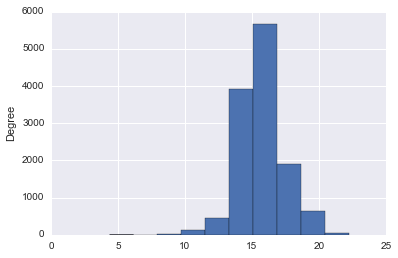

In [99]:
table = pd.Series(np.log([float(_) for _ in features_table[48]]))
table.plot(kind='hist')

Следующие две колонки почти всегда повторяются

In [337]:
sum(features_table[48] != features_table[49])

1

In [338]:
sum(features_table[48] != features_table[50])

1

In [105]:
table = features_table[51].value_counts()
table

wTgpJjxGacgy9sjcoSX3wWLAzNw=    12748
dtype: int64

Две колонки с валютами — возможно какую валятю отправляли какую получали

In [106]:
table = features_table[52].value_counts()
table

RUR    12748
dtype: int64

In [108]:
table = features_table[53].value_counts()
table

wTgpJjxGacgy9sjcoSX3wWLAzNw=    12748
dtype: int64

In [109]:
table = features_table[54].value_counts()
table

RUR    12748
dtype: int64

Возможно идентификатор транзакции

In [110]:
table = features_table[55].value_counts()
table

OafMhtcdi4IOIN1w+WTGusJZSwc=    1
xPl0q37VVQh3a+2hvO+45J1+ZzI=    1
F26bO16urklFTB8oJps0BsaSowI=    1
9EwjkAcFCJ5uXBpd5qUoC2b/v68=    1
He1nKNwR8x8dbQnMPmEl+vTl/S0=    1
3QYB3btlqpribm+Mb3Fuo+LB/9U=    1
7tQHd8bZHrQkSDhtWSwacxbMYLU=    1
nlXSNreIKeWAqdI7ku0HqpIMjYE=    1
cH1NV2jokxa6/NTSez+kkwwpQow=    1
ec/yOBuV0wKT60qV7De9Q70lxYQ=    1
F9rUdN1+zGJX/GEnnnuuipbZ+Cc=    1
fYH1kXyYSansX+LSy669qgCZsWU=    1
tgwbOz2kRbHLprIt5uLriASTS2I=    1
qHwcPJLapLmOEJSImVMNE29Yf2E=    1
5jOluasObwFoJM6Gv4WlKpccvxA=    1
g8TuYUGKX22SKkSevu1ysJZ5onQ=    1
YSmN4cWjJt6nT/SiC+q5pg5bWO0=    1
ytXNR50h7XlKiCHw+cc9hmikdfE=    1
WgAqnUDNUU66Yt9Knsn/XTznS94=    1
FWyIi2FYiWuvkEnlDZec9J4kzYI=    1
hXjO/cTu3MzRHH3CK7mr4CkAeKU=    1
RMJKSy3/IDfdHkDbtf5gm9DFPQ8=    1
+9R/UksmKGD9Aw25xlQxVFpMDK0=    1
SHB6enngAdlgJRjfaJFFDJiRy2s=    1
7BQY31D8t3jZ0lTTU4Ul8ucHC9w=    1
h/+31EDBSzH0Q4B0biGyaVoJtZI=    1
G612f4rPV2sHGurEtyxaGdFSaVU=    1
zj3N5ELPsvNzN5U8KygxH6ngB24=    1
cbwan2Fk7hXCz7EInlWjIH+UmxU=    1
2Is8XGv6K6s5ai

In [111]:
table = features_table[56].value_counts()
table

PROV         12747
TO_RETURN        1
dtype: int64

In [112]:
table = features_table[57].value_counts()
table

0Dw2prbHHA/LjiH1MNv+EwbrEIo=    12748
dtype: int64

# Случайный классификатор

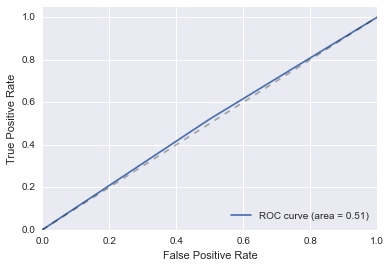

In [209]:
%run -n main.py
etalon = list(filter_target_by_month(target, JANUARY))
guesses = list(predict_churns0(etalon))
roc = get_roc(guesses, etalon)
show_roc(roc)

# Примитивный классификатор, который не смотрит на train.csv

In [416]:
churn_histories = get_churn_histories(target)
churn_history_rules = mine_churn_history_rules(churn_histories)
etalon = list(filter_target_by_month(target, JANUARY))
guesses = list(predict_churns1(etalon, churn_histories, churn_history_rules))

Мда, не очень

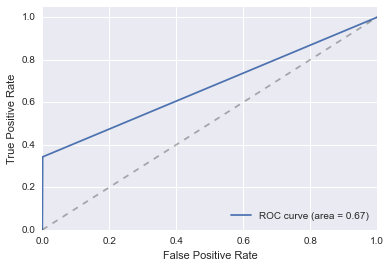

In [202]:
%run -n main.py
roc = get_roc(guesses, etalon)
show_roc(roc)

In [210]:
guesses = list(predict_churns1(test, churn_histories, churn_history_rules))

In [218]:
%run -n main.py
write_target(guesses, 'test.csv')

# Граф транзакций

Похоже train.csv — это лог транзакций. Переводы от id1 к id2. Попробуем построить граф, в котором в вершинах будут id. Если гипотеза верная граф будет выглядеть соответсвующим образом — очень разреженный, куча мелких кластеров

In [440]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
pairs_histogram = get_id_pairs_histogram(train)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

In [441]:
graph = build_transactions_graph(pairs_histogram)

In [351]:
%run -n main.py
write_transactions_graph(graph)

Нууу, я ожидал немного другого. Думал что между кластерами даже визуально будет мало связей. Но формально модулярность у графа 0.9 то есть кластера очерчены очень хорошо.
<img src="https://habrastorage.org/files/012/4b8/b45/0124b8b451c24d8d8b8904a3c1d979b0"/>

Вроде бы кластера часто объединяются вокруг одной вершины, что соответствует гипотезе про транзакции . 
<img src="https://habrastorage.org/files/94c/423/fcf/94c423fcf6054c41ae92e93c6d31c4c7"/>

В графе масса id, которых нет в обучении и тесте. Это нормально

In [353]:
print 'Total target ids:', len(set(target_ids + test_ids))
print 'Total ids in graph:', len(graph.node)

Total target ids: 27599
Total ids in graph: 190578


Про некоторых id из теста нет инфы в train.csv . Но для большинства из них есть история из target.csv . Для 40 неисзвестно вообще ничего

In [360]:
print 'No ids from test:', len(set(test_ids) - set(graph.node))
print 'No ids from test but in target:', len((set(test_ids) - set(graph.node)) & set(target_ids))

No ids from test: 198
No ids from test but in target: 158


Почти все id встечаются и как id1 и как id2 . Это странно конечно. Может быть есть транзакции об отправке и о приёме?

In [370]:
ids = set(test_ids)
print 'Ids in test:', len(ids)
print 'Ids from test appear as id1:', len(set(source for source, target in graph.edges() if source in ids))
print 'Ids from test appear as id2:', len(set(target for source, target in graph.edges() if target in ids))
ids = set(target_ids)
print 'Ids in target:', len(ids)
print 'Ids from target appear as id1:', len(set(source for source, target in graph.edges() if source in ids))
print 'Ids from target appear as id2:', len(set(target for source, target in graph.edges() if target in ids))

Ids in test: 26414
Ids from test appear as id1: 26168
Ids from test appear as id2: 25760
Ids in target: 19697
Ids from target appear as id1: 19497
Ids from target appear as id2: 19147


Но доля исходящих транзакций больше чем входящих . Что всё таки немного спасает гипотизу ,что мы работаем с транзакциями . Хотя распределение не такое крутое как хотелось бы видеть

In [442]:
%run -n main.py
in_transactions, out_transactions = get_in_out_transactions(pairs_histogram)

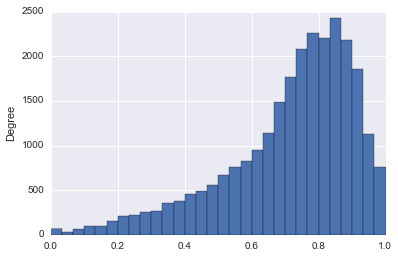

In [444]:
out_transactions_shares = []
for id in set(test_ids) & set(graph.node):
    id_in_transactions = in_transactions[id]
    id_out_transactions = out_transactions[id]
    share = float(id_out_transactions) / (id_in_transactions + id_out_transactions)
    out_transactions_shares.append(share)
table = pd.Series(out_transactions_shares)
table.plot(kind='hist', bins=30)

Распределение числа входящих и исходящих транзакций предсказуемое. Большое число исходящих встречается чаще , чем большое число входящих

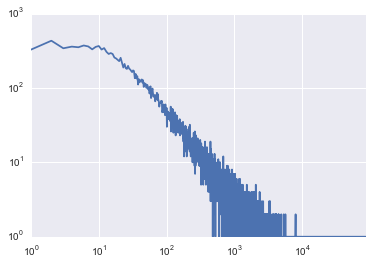

In [466]:
histogram = Counter(in_transactions[id] for id in set(test_ids) & set(graph.node))
table = pd.Series(histogram)
table.plot(logx=True, logy=True)

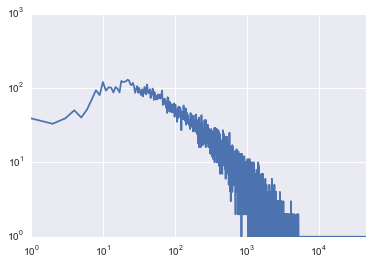

In [467]:
histogram = Counter(out_transactions[id] for id in set(test_ids) & set(graph.node))
table = pd.Series(histogram)
table.plot(logx=True, logy=True)

# Поищем отличия между ушедшими и оставшимися

##  По числу входящих исходящих транзакций

In [417]:
churn = set(_.id for _ in etalon if _.churn is True)
stay = set(_.id for _ in etalon if _.churn is False)

Ну да, у тех кто выгорел больше доля id с маленьким числом входящих транзакций

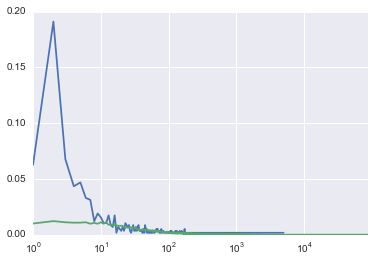

In [451]:
fig, ax = plt.subplots(1)
for ids in (churn, stay):
    ids = ids & set(graph.node)
    histogram = Counter(in_transactions[id] for id in ids)
    table = pd.Series(histogram)
    table = table / table.sum()
    table.plot(logx=True, logy=False, ax=ax)

У тех кто выгорел доля id наблюдается характерный пик в районе 10 исходящих странзакций

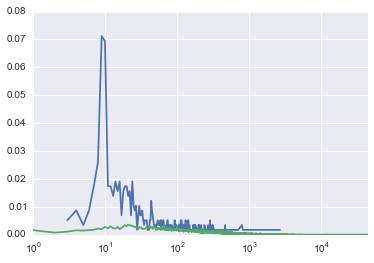

In [453]:
fig, ax = plt.subplots(1)
for ids in (churn, stay):
    ids = ids & set(graph.node)
    histogram = Counter(out_transactions[id] for id in ids)
    table = pd.Series(histogram)
    table = table / table.sum()
    table.plot(logx=True, logy=False, ax=ax)

In [474]:
%run -n main.py
guesses = list(predict_churns2(etalon, churn_histories, churn_history_rules, in_transactions, out_transactions))

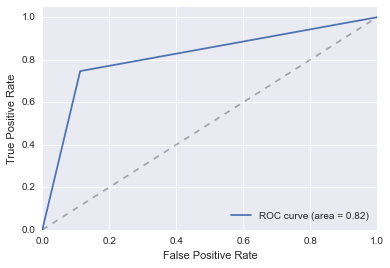

In [465]:
roc = get_roc(guesses, etalon)
show_roc(roc)

In [557]:
errors2 = list(get_errors(guesses, etalon))

## По положению в графе транзакций. А вдруг будет сигнал

In [543]:
%run -n main.py
churns = {_.id: _.churn for _ in etalon}
errors = {_.id: True for _ in get_errors(guesses, etalon)}
in_test = {_.id: True for _ in test}
graph = build_transactions_graph(pairs_histogram, churns=churns, errors=errors, test=in_test)
write_transactions_graph(graph)

Удивительно, но некоторые ушедшие группируются в кластер
<img src="https://habrastorage.org/files/09b/68e/f4c/09b68ef4c71748d78354ddc4de203a7d"/>

Правда этот кластер объединяет мягко говоря не всех ушедших
<img src="https://habrastorage.org/files/910/e6b/631/910e6b631e264c86931428474fabb3df"/>

И мы не делаем ошибок для id из этого кластера которые ушли. Ладно пока на эту тему забьём
<img src="https://habrastorage.org/files/f7b/e7d/7f2/f7be7d7f2ae64c81bac1f1833974c85f"/>

## По изменению числа транзакций во времени

In [692]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
in_months_transactions, out_months_transactions = get_in_out_transactions_by_months(train)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

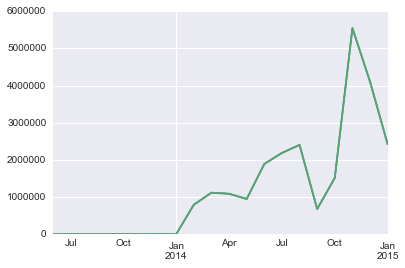

In [698]:
%run -n main.py
show_transactions_by_months(in_months_transactions)
show_transactions_by_months(out_months_transactions)

Какой-то особой разницы между распределением транзакций по месяцам не наблюдается . Просто в первом случае меньше данных и больше шум

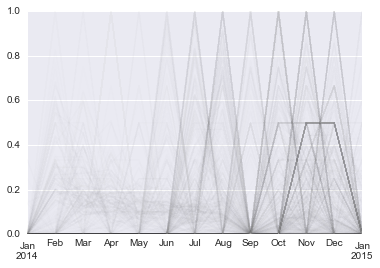

In [701]:
%run -n main.py
ids = {_.id for _ in target if _.churn == True}
show_ids_transactions_by_months(in_months_transactions, ids)

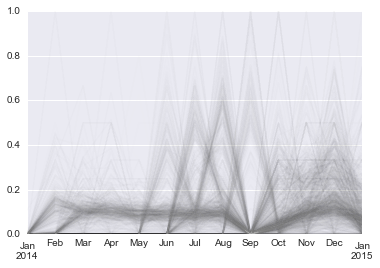

In [703]:
%run -n main.py
ids = {_.id for _ in random.sample(target, 2000) if _.churn == False}
show_ids_transactions_by_months(in_months_transactions, ids)

А вот по форме тренда разница есть

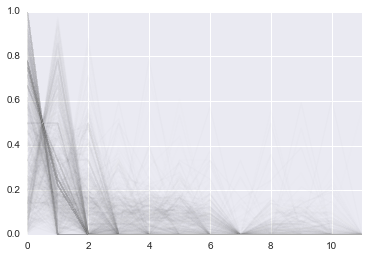

In [706]:
%run -n main.py
ids = {_.id for _ in target if _.churn is True}
show_ids_transactions_change(out_months_transactions, ids)

Особенно по входящим транзакциям. У выгоревших часто всё заканчивается на первом, втором месяце

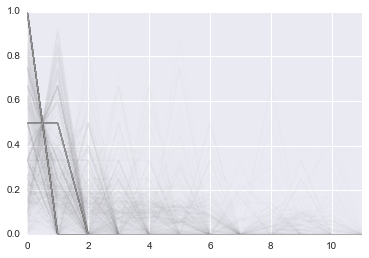

In [710]:
%run -n main.py
ids = {_.id for _ in target if _.churn is True}
show_ids_transactions_change(in_months_transactions, ids)

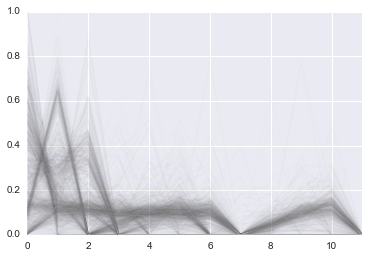

In [709]:
%run -n main.py
ids = {_.id for _ in random.sample(target, 2000) if _.churn is False}
show_ids_transactions_change(out_months_transactions, ids)

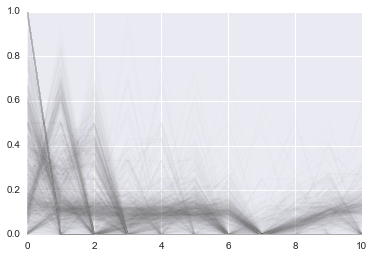

In [711]:
%run -n main.py
ids = {_.id for _ in random.sample(target, 2000) if _.churn is False}
show_ids_transactions_change(in_months_transactions, ids)

Определить тех, кто совершил много транзакций, но ушёл так наверное действительно получится

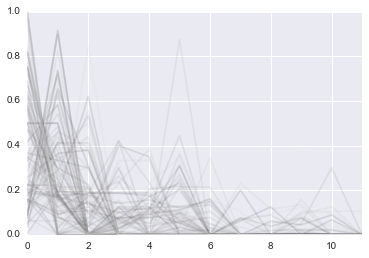

In [713]:
%run -n main.py
ids = {_.id for _ in errors2 if _.churn is False}
show_ids_transactions_change(in_months_transactions, ids, alpha=0.1)

А вот тех кто сделал мало транзакций и не ушёл — нет

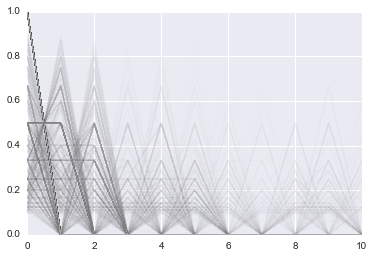

In [714]:
%run -n main.py
ids = {_.id for _ in errors2 if _.churn is True}
show_ids_transactions_change(in_months_transactions, ids)

Для простоты будем смотреть на число месяц , когда у id были входящие транзакции . Видно, что у ушедших распределение значительно смещено влево.

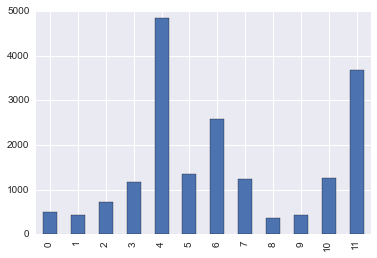

In [728]:
%run -n main.py
ids = {_.id for _ in target if _.churn is False}
show_months_count_distribution(in_months_transactions, ids)

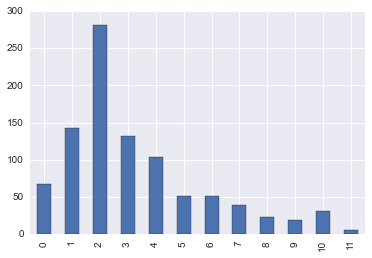

In [730]:
ids = {_.id for _ in target if _.churn is True}
show_months_count_distribution(in_months_transactions, ids)

Но так ли это хорошо работает для id, на которых мы ошибаемся? 

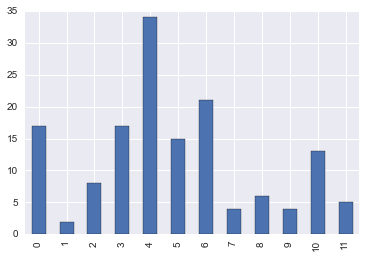

In [732]:
ids = {_.id for _ in errors2 if _.churn is False}
show_months_count_distribution(in_months_transactions, ids)

Да, для тех, кто на самом деле не ушёл распределение немного смещено вправо

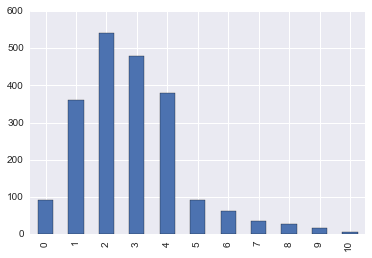

In [731]:
ids = {_.id for _ in errors2 if _.churn is True}
show_months_count_distribution(in_months_transactions, ids)

In [735]:
%run -n main.py
guesses = list(predict_churns3(
    etalon,
    churn_histories,
    churn_history_rules,
    in_transactions,
    out_transactions,
    in_months_transactions,
    out_months_transactions
))

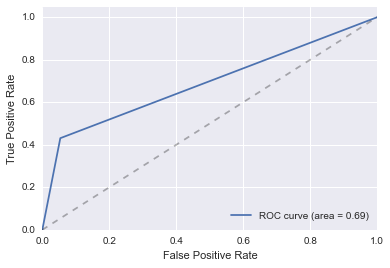

In [736]:
roc = get_roc(guesses, etalon)
show_roc(roc)

# Всё пришло время машинного обучения

In [928]:
%run -n main.py
features = list(make_features(
    etalon,
    churn_histories,
    in_months_transactions, out_months_transactions
))

In [956]:
%run -n main.py
train_features, test_features, train_target, test_target = split_in_train_test(features, etalon, train_share=0.9)
X_columns, X_train = get_feature_matrix(train_features)
_, X_test = get_feature_matrix(test_features)
y_train = get_target_matrix(train_target)
y_test = get_target_matrix(test_target)

In [982]:
%run -n main.py
model = train_model(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] forest__n_estimators=10, forest__max_depth=2 ....................
[CV]  forest__n_estimators=10, forest__max_depth=2, score=0.902863 -   0.1s
[CV] forest__n_estimators=10, forest__max_depth=2 ....................
[CV]  forest__n_estimators=10, forest__max_depth=2, score=0.900296 -   0.1s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    0.1s



[CV] forest__n_estimators=10, forest__max_depth=2 ....................
[CV]  forest__n_estimators=10, forest__max_depth=2, score=0.901963 -   0.1s
[CV] forest__n_estimators=500, forest__max_depth=2 ...................
[CV]  forest__n_estimators=500, forest__max_depth=2, score=0.915191 -   1.9s
[CV] forest__n_estimators=500, forest__max_depth=2 ...................
[CV]  forest__n_estimators=500, forest__max_depth=2, score=0.926202 -   1.9s
[CV] forest__n_estimators=500, forest__max_depth=2 ...................
[CV]  forest__n_estimators=500, forest__max_depth=2, score=0.924607 -   1.8s
[CV] forest__n_estimators=10, forest__max_depth=10 ...................
[CV]  forest__n_estimators=10, forest__max_depth=10, score=0.926393 -   0.1s
[CV] forest__n_estimators=10, forest__max_depth=10 ...................
[CV]  forest__n_estimators=10, forest__max_depth=10, score=0.883140 -   0.1s

[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:    6.0s



[CV] forest__n_estimators=10, forest__max_depth=10 ...................
[CV]  forest__n_estimators=10, forest__max_depth=10, score=0.889757 -   0.1s
[CV] forest__n_estimators=500, forest__max_depth=10 ..................
[CV]  forest__n_estimators=500, forest__max_depth=10, score=0.927099 -   4.4s
[CV] forest__n_estimators=500, forest__max_depth=10 ..................
[CV]  forest__n_estimators=500, forest__max_depth=10, score=0.917333 -   3.8s
[CV] forest__n_estimators=500, forest__max_depth=10 ..................
[CV]  forest__n_estimators=500, forest__max_depth=10, score=0.929323 -   4.0s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   18.4s finished


In [983]:
%run -n main
describe_model(model, X_columns)

Best score: 0.925
Parameters:
	forest__n_estimators: 500
	forest__max_depth: 10
Importance:
	0.215169087048 previous_month_churn_2
	0.174534860914 previous_month_churn_1
	0.153658927234 months_to_last_out_transaction
	0.106012336648 out_transactions
	0.0744244433657 in_transactions
	0.0638683409772 previous_month_churn_3
	0.0496766297544 out_months
	0.0458224671474 months_to_last_in_transaction
	0.0338701646646 months_to_first_out_transaction
	0.033345942077 in_months
	0.0331516506272 months_to_first_in_transaction
	0.00879109156215 before_previous_month_churn_1
	0.00767405798011 before_previous_month_churn_2


In [987]:
%run -n main.py
guesses = list(predict_churns4(test_target, model, X_test))

In [988]:
%run -n main.py
threshold = search_for_threshold(guesses, test_target)
guesses = list(threshold_guesses(guesses, threshold))

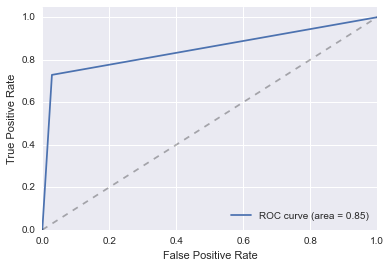

In [989]:
roc = get_roc(guesses, etalon)
show_roc(roc)

In [990]:
%run -n main.py
guesses = list(predict_churns4(etalon, model, X))

In [991]:
%run -n main.py
threshold = search_for_threshold(guesses, etalon)
guesses = list(threshold_guesses(guesses, threshold))

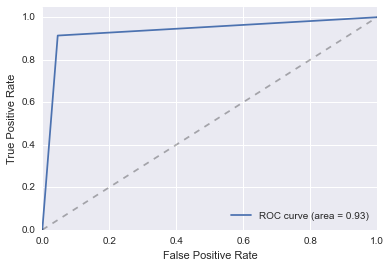

In [992]:
roc = get_roc(guesses, etalon)
show_roc(roc)

# Поищем дискретные фичи, которые не принимают слишком много разных значений

In [1022]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
distinct_values = count_features_distinct_values(train)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

Некоторые хешированные фичи принимают слишком много разных значений: 3, 4, 10, 13, 16, 17, 23, 29, 32, 35, 36, 55 — это вообще похоже идентификатор транзакции. С ними наверное ничего не получится сделать.

In [1024]:
pd.Series(distinct_values)

0       282961.694043
1         5422.257057
2       245678.056409
3     18183221.070958
4       144636.814055
5         9969.104022
6         5411.145408
7           35.036893
8          467.935416
9           26.199460
10      147068.542267
11        3761.884203
12          48.392963
13      136925.158446
14           7.231144
15        7386.780298
16      614990.406966
17      574199.975620
18        3083.586881
19         282.097814
20        3204.746527
21         405.886623
22           8.681630
23      118730.201525
24        8803.563279
25        4761.133972
26          35.036893
27         394.537120
28          24.731681
29      119256.941284
30        3175.610369
31          42.442019
32      117749.437378
33           7.231144
34        6121.837387
35      639406.810872
36      467882.754572
37        2852.380695
38         346.339228
39        2795.128320
40         477.870354
41           8.681630
42         164.655321
43         109.259232
44          73.955367
45        

In [1028]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
feature_histograms = count_features_histograms(train)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

Судя по гистограммам, некоторые хешированные фичи повторяют нехешированные их естественно опускаем в пользу нехешированных: 46, 53, 44. Некоторые хистограммы совпадают: 37 и 39, 18 и 20, 9 и 28 и 57 . Некоторые не совсем совпадают, но явно идут парами: 14 и 33, 22 и 41, то есть это некоторые характеристики пользователя. Некоторые совсем перекошенные: 56, 52, 46, 47. Не знаю, стоит ли на них смотреть, если почти для всех пользователей они будут принимать одно значение.

In [1037]:
%run -n main.py
show_features_histograms(feature_histograms)

14 5
	0.630	9tpw0k3iVpqAHzrlR2UMYtA6N2M=
	0.265	K+iMpCQsduglOsYkdIUQZQMtaDM=
	0.078	40moDWvi2ZOhvSUivfnzLRnjL+4=
	0.027	a5Y3b240ydbmxxi6RfqgoWopQq0=
	0.000	eNDv90/D5deOaUaoGHfOABVxlOM=
33 5
	0.499	9tpw0k3iVpqAHzrlR2UMYtA6N2M=
	0.319	K+iMpCQsduglOsYkdIUQZQMtaDM=
	0.144	40moDWvi2ZOhvSUivfnzLRnjL+4=
	0.037	a5Y3b240ydbmxxi6RfqgoWopQq0=
	0.000	eNDv90/D5deOaUaoGHfOABVxlOM=
22 6
	0.613	K+iMpCQsduglOsYkdIUQZQMtaDM=
	0.132	nSW16PgRSzY3S3D4i6YcNyMBubY=
	0.123	o+YcaQExf8aGYMWInGv960ffShU=
	0.100	v4Nn6tTHtoYfjbzuAFy9dkAxH30=
	0.024	ONZZOkw+k/JrEHNJpKURA8eYVzA=
	0.008	WwotvhCp0+9ZYKUnnSIiijC1K/E=
41 6
	0.570	K+iMpCQsduglOsYkdIUQZQMtaDM=
	0.128	o+YcaQExf8aGYMWInGv960ffShU=
	0.113	nSW16PgRSzY3S3D4i6YcNyMBubY=
	0.108	v4Nn6tTHtoYfjbzuAFy9dkAxH30=
	0.071	ONZZOkw+k/JrEHNJpKURA8eYVzA=
	0.009	WwotvhCp0+9ZYKUnnSIiijC1K/E=
57 16
	0.229	1X+UBlG07t36gjSIIdPmmPAqC6M=
	0.182	3Ji3G+ARmzO1yVBTSXEWqZ/RpUI=
	0.135	+0Z6k3cF2OYlodTc/ry7ENdHj/4=
	0.097	STEpHhIi9YenZHm1vdcY+taAg9w=
	0.087	0Dw2prbHHA/LjiH1MNv+EwbrEIo=
	0

Ладно, похоже, я вручную составил граф корреляции признаков
<img src="https://habrastorage.org/files/71d/ade/b55/71dadeb55f4041c0aaf6cc493c875a84"/>

In [1046]:
%run -n main.py
ids = set(target_ids + test_ids)
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
ids_features_histograms = count_ids_features_histograms(train, ids)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

5-15 действительно признаки пользователя, на id приходится почти всегда по одному значению. 18-22 должны были быть признаками , но принимают 2, а иногда и три значения на пользователя. Правда одно из значений наверное null. 52, валюта, тоже полючается как признак id. 57 тоже похож на признак.

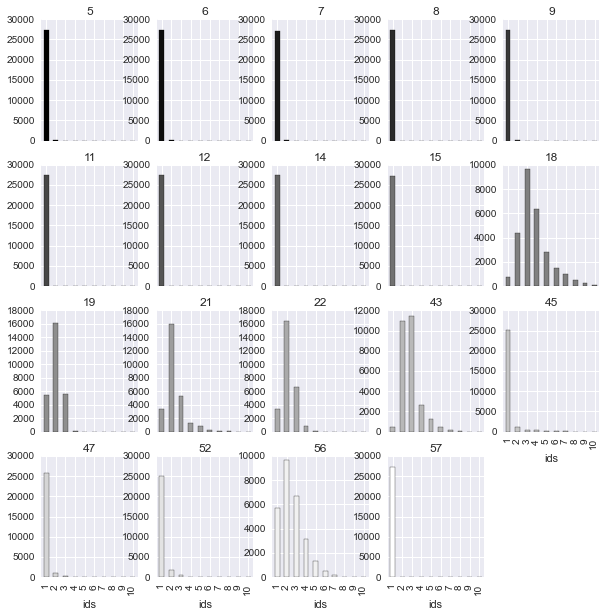

In [1062]:
%run -n main.py
show_features_ids_histograms(make_features_ids_histograms(ids_features_histograms))

In [1067]:
%run -n main.py
features_values_histogram = make_features_values_histograms(ids_features_histograms)
show_features_values_histograms(features_values_histogram)

5 unique: 5046
	5034	null
	283	625000
	114	693000
	112	625048
	107	000000
	87	628600
	77	625014
	77	675000
	73	672000
	65	680000
6 unique: 2408
	4128	Москва
	4121	null
	1891	Санкт-Петербург
	1023	Тюмень
	600	Самара
	570	Омск
	458	Воронеж
	322	ТЮМЕНЬ
	290	Владивосток
	245	Волгоград
7 unique: 19
	10122	Почтовый
	9991	Юридический
	5433	Фактический
	1765	Регистрация
	128	Место пребывания(фактического нахождения)
	36	  
	30	Юридический /не действует/
	30	Адрес банка-участника S.W.I.F.T.
	24	null
	19	Почтовый_
8 unique: 119
	23133	K+iMpCQsduglOsYkdIUQZQMtaDM=
	1187	8Fr5xcRCoQZZcqEbpcAqTs0gk6Q=
	640	8NHZwcvtbn+LCCz43s7pGOY4UBs=
	431	EDFQTLPGQ9VARpCGIetY6kFTC5o=
	399	z+2cOMyhOZLmwiLgYT8Ac0G9KxE=
	229	epY/yu+AplfBwRsVuRT0ms4m8h0=
	132	3E2tPGWvBECO6UfEjaUMR87FA5c=
	86	WmjJLM4r46ape6QRK4k30H5P8YY=
	86	t5u7MuonMmembhZyIjiskZpgJeM=
	85	hK9oF/XMZ6hvV6p8vX3r/h+mVTE=
9 unique: 17
	4515	1X+UBlG07t36gjSIIdPmmPAqC6M=
	4446	Antbbaf85R6dGC6FKWOZhUWY0Ps=
	3856	+0Z6k3cF2OYlodTc/ry7ENdHj/4=
	3744	3Ji3G+ARmzO1

# И снова время машинного обучения. Теперь с кучей дискретных фич

In [1312]:
%run -n main.py
features = list(make_features(
    etalon,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms
))

In [1313]:
%run -n main.py
X_columns, X = get_feature_matrix(features)
y = get_target_matrix(etalon)
train_indexes, test_indexes = get_train_test_indexes(len(features), train_share=0.9)
train_features = get_indexes(features, train_indexes)
test_features = get_indexes(features, test_indexes)
train_target = get_indexes(etalon, train_indexes)
test_target = get_indexes(etalon, test_indexes)
X_train = get_indexes(X, train_indexes)
X_test = get_indexes(X, test_indexes)
y_train = get_indexes(y, train_indexes)
y_test = get_indexes(y, test_indexes)

In [1592]:
%run -n main.py
model = train_model(X_train, y_train, estimators=(250,), depth=(10,))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.960811 -   7.2s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.968478 -   6.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:   13.8s



[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.962457 -   6.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.5s finished


In [1593]:
%run -n main
describe_model(model, X_columns)

Best score: 0.964
Parameters:
	forest__n_estimators: 250
	forest__max_depth: 10
118
Importance:
	0.145279360717 previous_month_churn_2
	0.121785354704 types_7
	0.094378019952 previous_month_churn_1
	0.066055580507 months_to_last_out_transaction
	0.0303864792201 out_transactions
	0.030060002016 out_amount
	0.0280211146633 previous_month_churn_3
	0.0264694780068 types_2
	0.0262672258813 months_to_last_in_transaction
	0.0251828722427 types_1
	0.0234001197231 feature_43_2
	0.0229910447377 feature_43_1
	0.0225074630766 in_transactions
	0.0204835480433 feature_18_10
	0.0195851434735 feature_19_10
	0.0191792048762 out_months
	0.0190129415465 feature_19_7
	0.0180609211553 feature_43_10
	0.0166818602067 feature_22_1
	0.0153536117797 feature_18_9
	0.0152541402498 types_5
	0.0142118688653 in_months
	0.0120238045505 feature_22_5
	0.0117442730121 months_to_first_in_transaction
	0.0116088077048 feature_21_10
	0.0114358671488 feature_21_9
	0.0108457356213 months_to_first_out_transaction
	0.0076816793

In [1594]:
guesses = list(predict_churns4(test_target, model, X_test))

In [1595]:
threshold = search_for_threshold(guesses, test_target)
guesses = list(threshold_guesses(guesses, threshold))

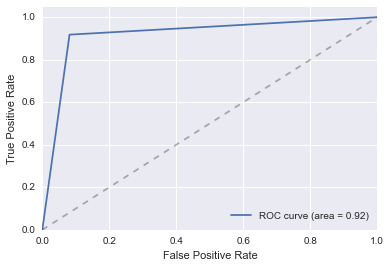

In [1598]:
roc = get_roc(guesses, test_target)
show_roc(roc)

In [1603]:
guesses = list(predict_churns4(etalon, model, X))

In [1604]:
%run -n main.py
threshold = search_for_threshold(guesses, etalon)
guesses = list(threshold_guesses(guesses, threshold))

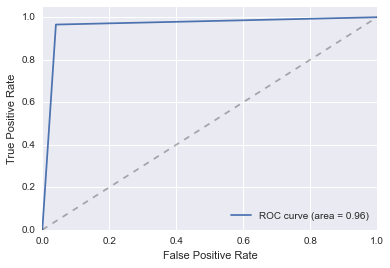

In [1606]:
roc = get_roc(guesses, etalon)
show_roc(roc)

# Теперь нужно основательно разобраться с настройкой параметров и результатами

## Аккуратно подберём пороги

In [1326]:
%run -n main.py
features = list(make_features(
    etalon,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms
))

In [1336]:
%run -n main.py
X_columns, X = get_feature_matrix(features)
y = get_target_matrix(etalon)
train_indexes, test_indexes = get_train_test_indexes(len(features), train_share=0.9)
train_features = get_indexes(features, train_indexes)
test_features = get_indexes(features, test_indexes)
train_target = get_indexes(etalon, train_indexes)
test_target = get_indexes(etalon, test_indexes)
X_train = get_indexes(X, train_indexes)
X_test = get_indexes(X, test_indexes)
y_train = get_indexes(y, train_indexes)
y_test = get_indexes(y, test_indexes)

In [1365]:
%run -n main.py
model = train_model(X_train, y_train, estimators=(10, 100, 500, 1000, 5000, 10000), depth=(2, 5, 10, 50), jobs=4, folds=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done   2 jobs       | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done   5 jobs       | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done   8 jobs       | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  13 jobs       | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done  18 jobs       | elapsed: 17.2min
[Parallel(n_jobs=4)]: Done  25 jobs       | elapsed: 25.3min
[Parallel(n_jobs=4)]: Done  32 jobs       | elapsed: 41.1min
[Parallel(n_jobs=4)]: Done  34 out of  40 | elapsed: 44.9min remaining:  7.9min
[Parallel(n_jobs=4)]: Done  39 out of  40 | elapsed: 60.1min remaining:  1.5min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 64.2min finished


[CV] forest__n_estimators=5000, forest__max_depth=2 ..................
[CV] forest__n_estimators=5000, forest__max_depth=2 ..................
[CV] forest__n_estimators=5000, forest__max_depth=2 ..................
[CV] forest__n_estimators=5000, forest__max_depth=2 ..................
[CV]  forest__n_estimators=5000, forest__max_depth=2, score=0.950444 - 1.9min[CV]  forest__n_estimators=5000, forest__max_depth=2, score=0.956581 - 1.9min[CV]  forest__n_estimators=5000, forest__max_depth=2, score=0.962231 - 1.9min[CV]  forest__n_estimators=5000, forest__max_depth=2, score=0.955226 - 1.9min



[CV] forest__n_estimators=5000, forest__max_depth=2 ..................[CV] forest__n_estimators=10000, forest__max_depth=2 .................[CV] forest__n_estimators=10000, forest__max_depth=2 .................[CV] forest__n_estimators=10000, forest__max_depth=2 .................



[CV]  forest__n_estimators=5000, forest__max_depth=2, score=0.953202 - 1.9min[CV]  forest__n_estimators=10000, forest__m

Оптимальная глубина в районе 10, оптимальное число деревьев в районе 500.

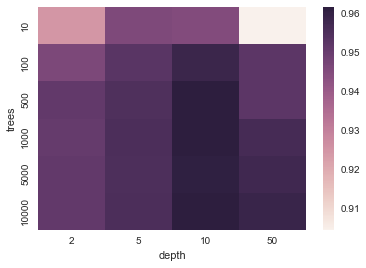

In [1371]:
show_grid_scores(model)

In [1376]:
%run -n main.py
model = train_model(X_train, y_train, estimators=(500,), depth=range(5, 50, 5), jobs=4, folds=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done   2 jobs       | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done   5 jobs       | elapsed:   32.7s
[Parallel(n_jobs=4)]: Done   8 jobs       | elapsed:   44.8s
[Parallel(n_jobs=4)]: Done  13 jobs       | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  18 jobs       | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  25 jobs       | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  32 jobs       | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  39 out of  45 | elapsed:  5.5min remaining:   50.9s
[Parallel(n_jobs=4)]: Done  44 out of  45 | elapsed:  6.1min remaining:    8.3s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  6.3min finished


[CV] forest__n_estimators=500, forest__max_depth=5 ...................
[CV] forest__n_estimators=500, forest__max_depth=5 ...................
[CV] forest__n_estimators=500, forest__max_depth=5 ...................
[CV] forest__n_estimators=500, forest__max_depth=5 ...................
[CV]  forest__n_estimators=500, forest__max_depth=5, score=0.955415 -  16.4s[CV]  forest__n_estimators=500, forest__max_depth=5, score=0.965560 -  16.8s[CV]  forest__n_estimators=500, forest__max_depth=5, score=0.969153 -  16.5s[CV]  forest__n_estimators=500, forest__max_depth=5, score=0.960761 -  16.2s



[CV] forest__n_estimators=500, forest__max_depth=5 ...................[CV] forest__n_estimators=500, forest__max_depth=10 ..................[CV] forest__n_estimators=500, forest__max_depth=10 ..................[CV] forest__n_estimators=500, forest__max_depth=10 ..................



[CV]  forest__n_estimators=500, forest__max_depth=5, score=0.957027 -  15.8s[CV]  forest__n_estimators=500, forest__max_dept

Да, действительно, глубина 10 лучше всего

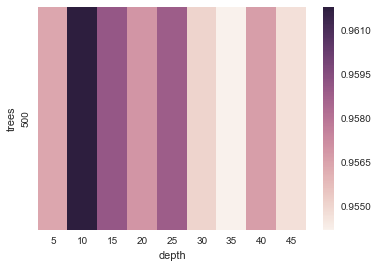

In [1377]:
%run -n main.py
show_grid_scores(model)

In [1382]:
%run -n main.py
model = train_model(X_train, y_train, estimators=range(50, 400, 50), depth=(10,), jobs=4, folds=5)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done   2 jobs       | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done   5 jobs       | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done   8 jobs       | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  13 jobs       | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done  18 jobs       | elapsed:   36.6s
[Parallel(n_jobs=4)]: Done  25 jobs       | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  29 out of  35 | elapsed:  1.3min remaining:   16.3s
[Parallel(n_jobs=4)]: Done  33 out of  35 | elapsed:  1.6min remaining:    5.9s
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:  1.7min finished


[CV] forest__n_estimators=50, forest__max_depth=10 ...................
[CV] forest__n_estimators=50, forest__max_depth=10 ...................
[CV] forest__n_estimators=50, forest__max_depth=10 ...................
[CV] forest__n_estimators=50, forest__max_depth=10 ...................
[CV]  forest__n_estimators=50, forest__max_depth=10, score=0.955935 -   3.2s[CV]  forest__n_estimators=50, forest__max_depth=10, score=0.963207 -   3.3s[CV]  forest__n_estimators=50, forest__max_depth=10, score=0.975168 -   3.4s[CV]  forest__n_estimators=50, forest__max_depth=10, score=0.961850 -   3.3s



[CV] forest__n_estimators=50, forest__max_depth=10 ...................[CV] forest__n_estimators=100, forest__max_depth=10 ..................[CV] forest__n_estimators=100, forest__max_depth=10 ..................[CV] forest__n_estimators=100, forest__max_depth=10 ..................



[CV]  forest__n_estimators=50, forest__max_depth=10, score=0.956003 -   3.2s[CV]  forest__n_estimators=100, forest__max_dept

Будем считать что 250 деревьев будет достаточно

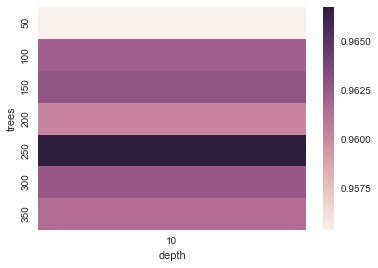

In [1383]:
%run -n main.py
show_grid_scores(model)

In [1385]:
guesses = list(predict_churns4(test_target, model, X_test))

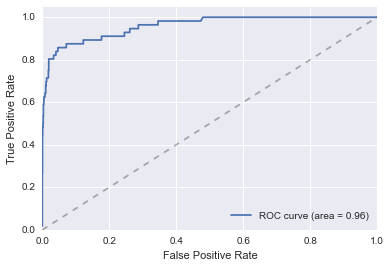

In [1387]:
roc = get_roc(guesses, etalon)
show_roc(roc)

In [ ]:
threshold = search_for_threshold(guesses, test_target)
guesses = list(threshold_guesses(guesses, threshold))

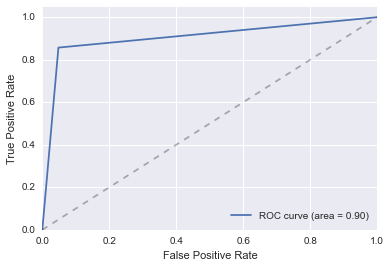

In [1389]:
roc = get_roc(guesses, test_target)
show_roc(roc)

## Посмотрим на сколько бинаризация ухудшает результат

In [1411]:
%run -n main.py
before = []
thresholds = []
after = []
X_columns, X = get_feature_matrix(features)
y = get_target_matrix(etalon)
for slice in range(10):
    train_indexes, test_indexes = get_train_test_indexes_slice(len(features), slice, 10)
    train_features = get_indexes(features, train_indexes)
    test_features = get_indexes(features, test_indexes)
    train_target = get_indexes(etalon, train_indexes)
    test_target = get_indexes(etalon, test_indexes)
    X_train = get_indexes(X, train_indexes)
    X_test = get_indexes(X, test_indexes)
    y_train = get_indexes(y, train_indexes)
    y_test = get_indexes(y, test_indexes)
    
    model = train_forest_model(X_train, y_train, estimators=250, depth=10)
    guesses = list(predict_churns4(test_target, model, X_test))
    
    roc = get_roc(guesses, test_target)
    before.append(get_auc(roc))
    
    threshold = search_for_threshold(guesses, test_target)
    thresholds.append(threshold)
    guesses = list(threshold_guesses(guesses, threshold))
    
    roc = get_roc(guesses, test_target)
    after.append(get_auc(roc))

На 4-5% AUC падает из-за бинаризации

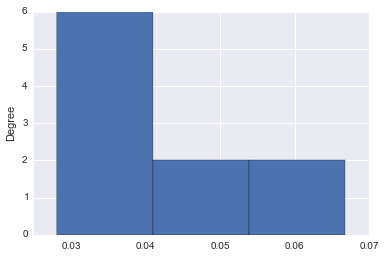

In [1412]:
table = pd.DataFrame()
table['before'] = before
table['threshold'] = thresholds
table['after'] = after
table.delta = table.before - table.after
table.delta.plot(kind='hist', bins=3)

Порог всегда значительно меньше 0.5, но сильно гуляет от 0.01 до 0.1

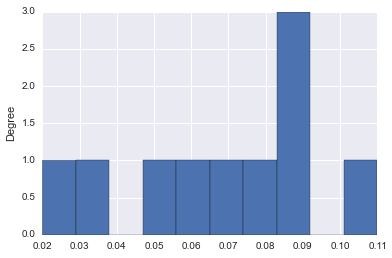

In [1413]:
table.threshold.plot(kind='hist')

## Теперь посмотрим как ухудшает результат отсутствие информации об оттоке за прошлые месяцы

In [1432]:
%run -n main.py
before = []
after = []
X_columns, X = get_feature_matrix(features)
fake_features = []
for record in features:
    if random.random() < 0.3:
        record = record._replace(
            before_previous_month_churn=UNKNOWN_CHURN,
            previous_month_churn=UNKNOWN_CHURN
        )
    fake_features.append(record)
_, fake_X = get_feature_matrix(fake_features)
y = get_target_matrix(etalon)
for slice in range(10):
    train_indexes, test_indexes = get_train_test_indexes_slice(len(features), slice, 10)
    test_target = get_indexes(etalon, test_indexes)
    X_train = get_indexes(X, train_indexes)
    X_test = get_indexes(X, test_indexes)
    y_train = get_indexes(y, train_indexes)
    
    fake_X_test = get_indexes(fake_X, test_indexes)
    
    model = train_forest_model(X_train, y_train, estimators=250, depth=10)
    
    guesses = predict_churns4(test_target, model, X_test)
    guesses = list(threshold_guesses(guesses, threshold=0.05))
    roc = get_roc(guesses, test_target)
    before.append(get_auc(roc))
    
    guesses = predict_churns4(test_target, model, fake_X_test)
    guesses = list(threshold_guesses(guesses, threshold=0.05))
    roc = get_roc(guesses, test_target)
    after.append(get_auc(roc))

30% id без оценок за прошлые месяцы будут опускать скор на ~6% , что конечно дофига, но что поделаешь

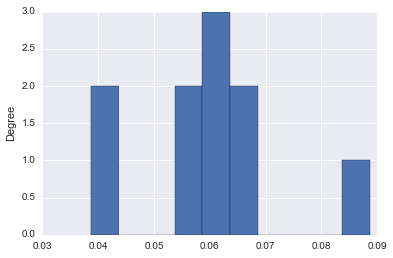

In [1433]:
table = pd.DataFrame()
table['before'] = before
table['after'] = after
table.delta = table.before - table.after
table.delta.plot(kind='hist', bins=10)

# Вспомним, что у нас есть граф транзакций и всё-таки попробуем им как-то воспользоваться

Ладно, оно не посчиталось за ночь, на фиг . Будем считать, что in_degree и out_degree будет достаточно

In [ ]:
ids = set(target_ids + test_ids)
centralities = nx.algorithms.bipartite.centrality.betweenness_centrality(graph, ids)

# Попробуем ещё воспользоваться суммами переводов

In [1449]:
%run -n main.py
train = log_progress(read_train(RAW_TRAIN), total=TRAIN_SIZE)
ids = set(target_ids + test_ids)
in_amounts, out_amounts = get_ids_in_out_amounts(train, ids)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

In [1580]:
%run -n main.py
features = list(make_features(
    etalon,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms,
    in_amounts, out_amounts
))

In [1581]:
%run -n main.py
X_columns, X = get_feature_matrix(features)
y = get_target_matrix(etalon)
train_indexes, test_indexes = get_train_test_indexes(len(features), train_share=0.9)
train_features = get_indexes(features, train_indexes)
test_features = get_indexes(features, test_indexes)
train_target = get_indexes(etalon, train_indexes)
test_target = get_indexes(etalon, test_indexes)
X_train = get_indexes(X, train_indexes)
X_test = get_indexes(X, test_indexes)
y_train = get_indexes(y, train_indexes)
y_test = get_indexes(y, test_indexes)

In [1582]:
%run -n main.py
model = train_model(X_train, y_train, estimators=(250,), depth=(10,), jobs=1, folds=10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.955608 -  10.1s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.961342 -   9.4s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:   19.6s



[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.966676 -   9.8s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.964807 -   9.4s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.983078 -   9.3s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.966537 -   9.4s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.966624 -   9.3s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.971825 -   9.4s

[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:   48.1s
[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:  1.3min



[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.973642 -   9.9s
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.942875 -  10.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


Да, нормальная фича. Особенно out_amount

In [1583]:
%run -n main
describe_model(model, X_columns)

Best score: 0.965
Parameters:
	forest__n_estimators: 250
	forest__max_depth: 10
Importance:
	0.137595462854 previous_month_churn_2
	0.110830317854 types_7
	0.106785918848 previous_month_churn_1
	0.0714988115659 months_to_last_out_transaction
	0.0315092098598 previous_month_churn_3
	0.0307291900347 out_amount
	0.0281028704726 out_transactions
	0.0263010945698 months_to_last_in_transaction
	0.0247822196413 types_2
	0.0237547904196 feature_43_2
	0.0229513910942 feature_18_10
	0.0219878119453 types_1
	0.0218616837265 feature_19_10
	0.0214486445089 in_transactions
	0.0211059053761 feature_43_1
	0.0194772588443 out_months
	0.0186149955224 feature_43_10
	0.0174068828025 feature_19_7
	0.016144092593 feature_18_9
	0.0158956911292 feature_22_1
	0.0156371449014 in_months
	0.0142685115784 types_5
	0.0132131967642 feature_22_5
	0.0118828348626 feature_21_10
	0.0116957862624 months_to_first_in_transaction
	0.0113123648877 months_to_first_out_transaction
	0.010108151951 feature_21_9
	0.00827438788798

# Всё надо посчитать результат

Разобьём тестовую выборку на две части: там где есть история оценок churn и там где нет. Потому что есть фичи before_previous_month_churn, previous_month_churn , они очень сильные и не хотелось бы они работали негативно для второй части

In [1702]:
test_with_history = []
test_no_history = []
for record in test:
    if record.id in churn_histories:
        test_with_history.append(record)
    else:
        test_no_history.append(record)

In [1716]:
print 'With history:', len(test_with_history)
print 'No history:', len(test_no_history)

With history: 18512
No history: 7902


## Модель для id с историей

In [1720]:
%run -n main.py
ids = set(test_ids)
etalon_for_test_with_history = list(filter_target_by_ids(etalon, ids))
etalon_features = list(make_features(
    etalon_for_test_with_history,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms,
    in_amounts, out_amounts
))
X_columns, etalon_X = get_feature_matrix(etalon_features)
y = get_target_matrix(etalon_for_test_with_history)

In [1724]:
%run -n main.py
model = train_model(etalon_X, y, estimators=(150, 250, 350), depth=(10, 20, 30), jobs=4, folds=2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done   2 jobs       | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done   8 jobs       | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done   5 jobs       | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done  13 jobs       | elapsed:   39.0s
[Parallel(n_jobs=4)]: Done  14 out of  18 | elapsed:   40.0s remaining:   11.4s
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:   40.4s remaining:   20.2s
[Parallel(n_jobs=4)]: Done  16 out of  18 | elapsed:   52.3s remaining:    6.5s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:   55.7s finished


[CV] forest__n_estimators=150, forest__max_depth=10 ..................
[CV] forest__n_estimators=150, forest__max_depth=10 ..................
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=150, forest__max_depth=10, score=0.900531 -   6.3s[CV]  forest__n_estimators=150, forest__max_depth=10, score=0.894469 -   6.5s[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.900702 -  10.4s[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.890173 -  10.2s



[CV] forest__n_estimators=350, forest__max_depth=10 ..................[CV] forest__n_estimators=350, forest__max_depth=10 ..................[CV] forest__n_estimators=150, forest__max_depth=20 ..................[CV] forest__n_estimators=150, forest__max_depth=20 ..................



[CV]  forest__n_estimators=350, forest__max_depth=10, score=0.911742 -  14.6s[CV]  forest__n_estimators=350, forest__max

In [1725]:
describe_model(model, X_columns)

Best score: 0.902
Parameters:
	forest__n_estimators: 350
	forest__max_depth: 10
118
Importance:
	0.157734291075 types_7
	0.0388114602831 out_amount
	0.0383793616525 out_transactions
	0.0375509032523 feature_43_2
	0.0374936038815 feature_43_1
	0.035897494487 types_1
	0.0347617488714 feature_43_10
	0.0328574728041 feature_18_9
	0.0327348324905 in_transactions
	0.0318065375702 feature_18_10
	0.0290610177322 feature_19_10
	0.0283353911571 types_2
	0.0257044929232 feature_22_5
	0.0248509584434 feature_21_10
	0.0233094552858 feature_22_1
	0.0209589960809 types_5
	0.0175680250288 in_months
	0.0159532432695 feature_21_9
	0.0148312843879 months_to_last_in_transaction
	0.0135259581073 months_to_first_in_transaction
	0.0134711332698 in_amount
	0.0125750318999 feature_19_9
	0.0125101106666 feature_18_3
	0.0124119555025 feature_19_7
	0.0118301000966 feature_22_2
	0.0112001970969 feature_21_3
	0.0108845602461 types_9
	0.0108788912005 months_to_first_out_transaction
	0.0105700882253 feature_19_1
	0.0

In [1726]:
thresholds = []
for slice in range(10):
    train_indexes, test_indexes = get_train_test_indexes_slice(len(etalon_features), slice, 10)
    test_target = get_indexes(etalon_for_test_with_history, test_indexes)
    X_test = get_indexes(etalon_X, test_indexes)

    guesses = list(predict_churns4(test_target, model, X_test))
    threshold = search_for_threshold(guesses, test_target)
    thresholds.append(threshold)

In [1728]:
print 'Average threshold:', sum(thresholds) / len(thresholds)

Average threshold: 0.068


In [1729]:
%run -n main.py
test_features = list(make_features(
    test_with_history,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms,
    in_amounts, out_amounts
))
X_columns, test_X = get_feature_matrix(test_features)
guesses_with_history = list(predict_churns4(test_with_history, model, test_X))
guesses_with_history = list(threshold_guesses(guesses, threshold=0.068))

In [1710]:
Counter(_.churn for _ in etalon_for_test_with_history)

Counter({False: 18200, True: 207})

In [1730]:
Counter(_.churn for _ in guesses)

Counter({False: 18029, True: 483})

## Модель для id без истории

In [1733]:
%run -n main.py
ids = set(test_ids)
etalon_for_test_no_history = list(filter_target_by_ids(etalon, ids))
etalon_features = [
    record._replace(
        before_previous_month_churn=UNKNOWN_CHURN,
        previous_month_churn=UNKNOWN_CHURN
    )
    for record in make_features(
        etalon_for_test_no_history,
        churn_histories,
        in_months_transactions, out_months_transactions,
        ids_features_histograms,
        in_amounts, out_amounts
    )
]
X_columns, etalon_X = get_feature_matrix(etalon_features)
y = get_target_matrix(etalon_for_test_no_history)

In [1734]:
%run -n main.py
model = train_model(etalon_X, y, estimators=(150, 250, 350), depth=(10, 20, 30), jobs=4, folds=2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   2 jobs       | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done   8 jobs       | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done   5 jobs       | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done  13 jobs       | elapsed:   57.8s
[Parallel(n_jobs=4)]: Done  14 out of  18 | elapsed:   59.1s remaining:   16.9s
[Parallel(n_jobs=4)]: Done  12 out of  18 | elapsed:   59.6s remaining:   29.8s
[Parallel(n_jobs=4)]: Done  16 out of  18 | elapsed:  1.4min remaining:   10.2s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  1.5min finished


[CV] forest__n_estimators=150, forest__max_depth=10 ..................
[CV] forest__n_estimators=150, forest__max_depth=10 ..................
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV] forest__n_estimators=250, forest__max_depth=10 ..................
[CV]  forest__n_estimators=150, forest__max_depth=10, score=0.907923 -   7.5s[CV]  forest__n_estimators=150, forest__max_depth=10, score=0.894021 -   7.8s[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.908155 -  11.5s[CV]  forest__n_estimators=250, forest__max_depth=10, score=0.892470 -  11.4s



[CV] forest__n_estimators=350, forest__max_depth=10 ..................[CV] forest__n_estimators=350, forest__max_depth=10 ..................[CV] forest__n_estimators=150, forest__max_depth=20 ..................[CV] forest__n_estimators=150, forest__max_depth=20 ..................



[CV]  forest__n_estimators=350, forest__max_depth=10, score=0.907675 -  16.0s[CV]  forest__n_estimators=350, forest__max

In [1735]:
describe_model(model, X_columns)

Best score: 0.901
Parameters:
	forest__n_estimators: 150
	forest__max_depth: 10
118
Importance:
	0.159612720145 types_7
	0.0410487181002 out_amount
	0.0403345718629 types_1
	0.0385709624495 feature_43_2
	0.0383477902412 out_transactions
	0.0353089797431 feature_43_1
	0.0345270843172 feature_18_10
	0.0338954590168 feature_19_10
	0.0335455489652 feature_18_9
	0.0334348411784 feature_43_10
	0.0315706259705 in_transactions
	0.0259371717663 types_2
	0.0256730464594 feature_22_5
	0.0253656235508 feature_21_10
	0.0246507523622 types_5
	0.0227597324054 feature_22_1
	0.0188347673774 in_months
	0.0157320316114 feature_21_9
	0.0145176348076 in_amount
	0.0142592659406 feature_19_9
	0.0137830063595 feature_19_7
	0.0135718616543 months_to_first_in_transaction
	0.0125971302201 out_months
	0.0121064344025 months_to_last_in_transaction
	0.0120767895287 feature_22_2
	0.0118732573677 months_to_first_out_transaction
	0.0106370957881 types_4
	0.010030497757 feature_21_3
	0.00998276729792 feature_18_3
	0.00

In [1739]:
thresholds = []
for slice in range(10):
    train_indexes, test_indexes = get_train_test_indexes_slice(len(etalon_features), slice, 10)
    test_target = get_indexes(etalon_for_test_no_history, test_indexes)
    X_test = get_indexes(etalon_X, test_indexes)

    guesses = list(predict_churns4(test_target, model, X_test))
    threshold = search_for_threshold(guesses, test_target)
    thresholds.append(threshold)

In [1740]:
print 'Average threshold:', sum(thresholds) / len(thresholds)

Average threshold: 0.069


In [1745]:
%run -n main.py
test_features = list(make_features(
    test_no_history,
    churn_histories,
    in_months_transactions, out_months_transactions,
    ids_features_histograms,
    in_amounts, out_amounts
))
X_columns, test_X = get_feature_matrix(test_features)
guesses_no_history = list(predict_churns4(test_no_history, model, test_X))
guesses_no_history = list(threshold_guesses(guesses_no_history, threshold=0.069))

In [1746]:
Counter(_.churn for _ in guesses_no_history)

Counter({False: 7007, True: 895})

## Всё вместе

In [1750]:
guesses = guesses_with_history + guesses_no_history

In [1751]:
len(test)

26414

In [1752]:
len(guesses)

26414

In [1749]:
%run -n main.py
write_target(guesses, 'test.csv')